In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

def read_log(logFile):
    with open(logFile,'r') as f:
        origin_log=f.readlines()
    train_epoch_loss = []
    eval_epoch_precision = []
    epoch_idx = 0
    for line in origin_log:
        line = line.strip('\n')
        if line.startswith('Whole Epoch'):
            # train_epoch_loss
            info = line.split('|')
            loss = float(info[2][7:])
            train_epoch_loss.append([epoch_idx, loss])
        elif line.startswith('Evaluating!'):
            info = line.split('|')
            pred = float(info[2][7:])
            eval_epoch_precision.append([epoch_idx, pred])
            epoch_idx += 1
    return train_epoch_loss, eval_epoch_precision

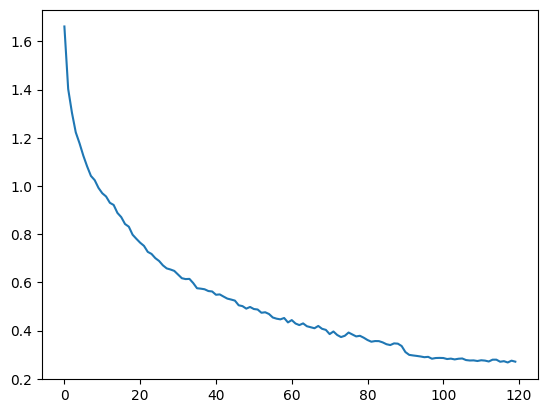

In [11]:
logFile = "../work_dir/refclef/(Aug27_16-51)_train_arch_coef_0.1_bias_init_3_batch_512/rank_0.txt"
train_loss, eval_prec = read_log(logFile)
# loss
epoch_idx = [i for i in range(len(train_loss))]
loss = [train_loss[i][1] for i in range(len(train_loss))]
plt.plot(epoch_idx, loss)
plt.show()

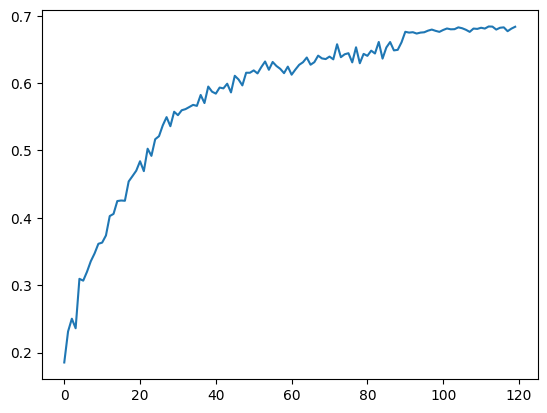

In [12]:
# test
prec = [eval_prec[i][1] for i in range(len(epoch_idx))]
plt.plot(epoch_idx, prec)
plt.show()